<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

PassengerId = test['PassengerId']

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
import pandas as pd
tup_data = ('영인', '2010-05-01', '여', True)
sr = pd.Series(tup_data, index=['이름', '생년월일', '성별', '학생여부'])
print(sr[[1,2]]) ## [[]]로 인덱싱하면 짝을 이루는 원소데이터 모두를 반환한다.
print(sr[['생년월일', '성별']])

생년월일    2010-05-01
성별               여
dtype: object
생년월일    2010-05-01
성별               여
dtype: object


In [ ]:
fd=[train, test]

In [ ]:
fd=[train, test]

In [ ]:
train['Name_length'] = train['Name'].apply(len) 
test['Name_length'] = test['Name'].apply(len) 

In [ ]:
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

In [ ]:
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [ ]:
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [ ]:
for dataset in fd:
  dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
for dataset in fd:
  dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [ ]:
for dataset in fd:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['Family_size']==1, 'IsAlone'] = 1

In [ ]:
for dataset in fd:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['Family_size']==1, 'IsAlone'] = 1

In [ ]:
## 결측치 채우기

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Name_length      0
Has_Cabin        0
Family_size      0
IsAlone          0
Fare_cut         0
Age_cut          0
Title            0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Name_length      0
Has_Cabin        0
Family_size      0
IsAlone          0
Title            0
dtype: int64

In [ ]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,Family_size,IsAlone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,19,1,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,41,1,1,1


In [ ]:
train[(train['Fare']>78)&(train['Fare']<82)&(train['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,Family_size,IsAlone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,19,1,1,1
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,18,1,1,1
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,30,0,1,1
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,17,1,3,0
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,28,0,1,1
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,25,1,3,0
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,30,1,2,0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,38,1,3,0
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,19,1,3,0
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,32,1,3,0


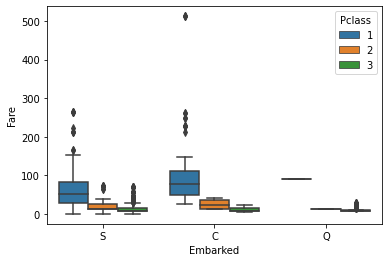

In [ ]:
sns.boxplot('Embarked', 'Fare', hue='Pclass', data=train )

In [ ]:
train['Embarked'].fillna('C', inplace=True)

In [ ]:
train['Embarked'].fillna('C', inplace=True)

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,Family_size,IsAlone
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,18,0,1,1


In [ ]:
test.loc[test['Fare'].isnull(), 'Fare'] = test[(test['Pclass']==3)&(test['Embarked']=='S')].Fare.mean()

In [ ]:
test.Fare.fillna(test[(test['Pclass']==3)&(test['Embarked']=='S')].Fare.mean(), inplace=True)

In [ ]:
test.loc[test['Fare'].isnull(), 'Fare'] = test[(test['Pclass']==3)&(test['Embarked']=='S')].Fare.mean()

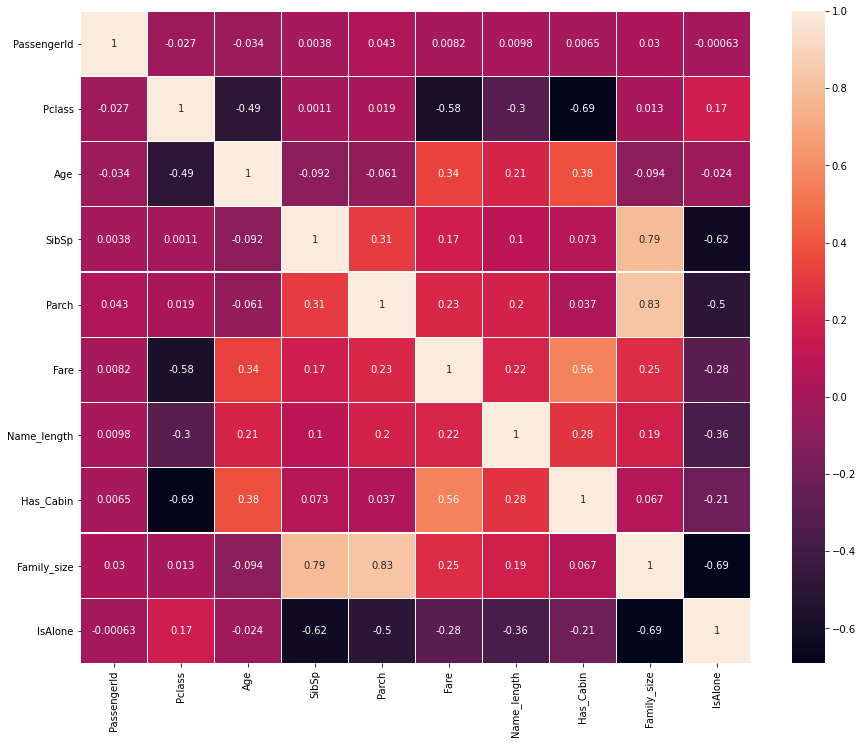

In [ ]:
sns.heatmap(test.corr(),annot=True, linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,12)

In [ ]:
train['Fare_cut'] = pd.qcut(train['Fare'], 4)

In [ ]:
train['Fare_cut'] = pd.qcut(train['Fare'], 4)

In [ ]:
train.loc[(train['Age'].isnull())&(train['Pclass']==1), 'Age'] = train[train['Pclass']==1].Age.mean()
train.loc[(train['Age'].isnull())&(train['Pclass']==2), 'Age'] = train[train['Pclass']==2].Age.mean()
train.loc[(train['Age'].isnull())&(train['Pclass']==3), 'Age'] = train[train['Pclass']==3].Age.mean()
test.loc[(test['Age'].isnull())&(test['Pclass']==1), 'Age'] = test[test['Pclass']==1].Age.mean()
test.loc[(test['Age'].isnull())&(test['Pclass']==2), 'Age'] = test[test['Pclass']==2].Age.mean()
test.loc[(test['Age'].isnull())&(test['Pclass']==3), 'Age'] = test[test['Pclass']==3].Age.mean()

In [ ]:
for dataset in fd:
  dataset['Age'].astype(int)

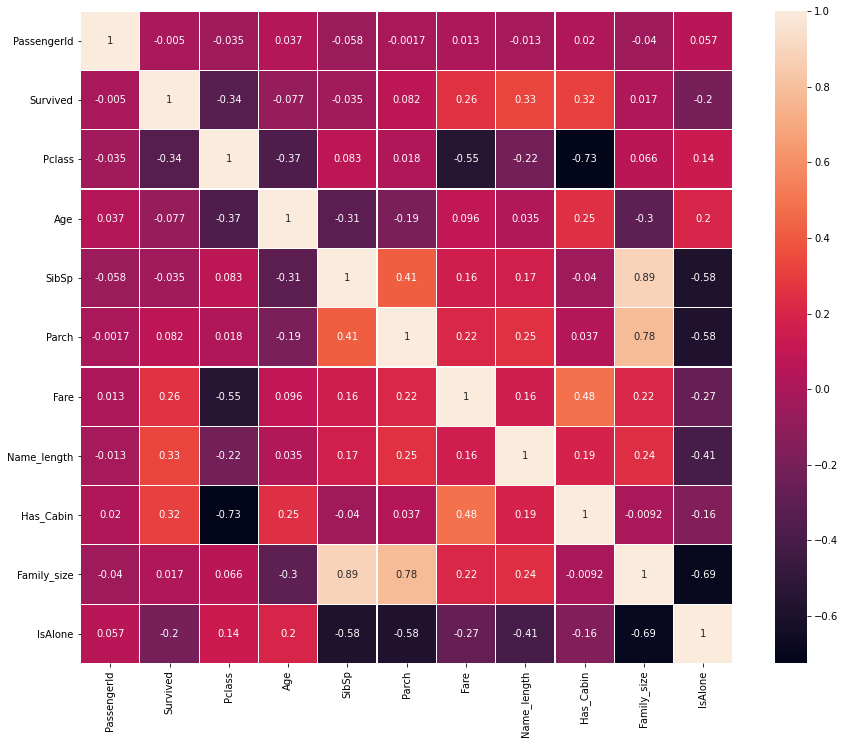

In [ ]:
sns.heatmap(train.corr(),annot=True, linewidths=0.2, square=True)
fig = plt.gcf()
fig.set_size_inches(15,12)

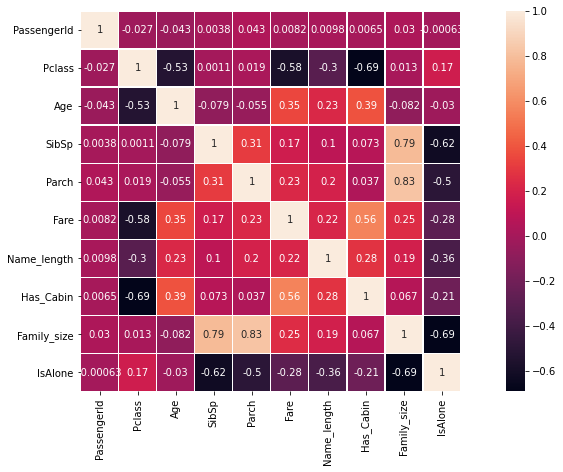

In [ ]:
sns.heatmap(test.corr(),annot=True, linewidths=0.2, square=True)
fig = plt.gcf()
fig.set_size_inches(16,7)

In [ ]:
train.loc[(train['Age'].isnull())&(train['Pclass']==1), 'Age'] = train[train['Pclass']==1].Age.median()
train.loc[(train['Age'].isnull())&(train['Pclass']==2), 'Age'] = train[train['Pclass']==2].Age.median()
train.loc[(train['Age'].isnull())&(train['Pclass']==3), 'Age'] = train[train['Pclass']==3].Age.median()
test.loc[(test['Age'].isnull())&(test['Pclass']==1), 'Age'] = test[test['Pclass']==1].Age.median()
test.loc[(test['Age'].isnull())&(test['Pclass']==2), 'Age'] = test[test['Pclass']==2].Age.median()
test.loc[(test['Age'].isnull())&(test['Pclass']==3), 'Age'] = test[test['Pclass']==3].Age.median()

In [ ]:
for dataset in fd:
  dataset.loc[(dataset['Age'].isnull())&(dataset['Pclass']==1), 'Age'] = dataset[dataset['Pclass']==1].Age.median()
  dataset.loc[(dataset['Age'].isnull())&(dataset['Pclass']==2), 'Age'] = dataset[dataset['Pclass']==2].Age.median()
  dataset.loc[(dataset['Age'].isnull())&(dataset['Pclass']==3), 'Age'] = dataset[dataset['Pclass']==3].Age.median()
  dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
train['Age_cut'] = pd.qcut(train['Age'], 5)

In [ ]:
train['Age_cut'] = pd.qcut(train['Age'],5)

In [ ]:
dataset['Age'].isnull().any()

False

In [ ]:
for dataset in fd:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
for dataset in fd:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
for dataset in fd:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.') 

In [ ]:
train['Title'].isnull().sum()

0

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,Family_size,IsAlone,Fare_cut,Age_cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,23,0,2,0,"(-0.001, 7.91]","(20.0, 25.141]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,51,1,2,0,"(31.0, 512.329]","(30.0, 38.233]",2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,22,0,1,1,"(7.91, 14.454]","(25.141, 30.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,44,1,2,0,"(31.0, 512.329]","(30.0, 38.233]",2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,24,0,1,1,"(7.91, 14.454]","(30.0, 38.233]",0


In [ ]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [ ]:
for dataset in fd:
  dataset['Title'].replace(['Dr','Rev','Major', 'Col', 'Jonkheer', 'Countess', 'Sir', 'Don', 'Capt', 'Dona'], 'Rare', inplace=True)
  dataset['Title'].replace(['Mlle','Ms','Lady'], 'Miss', inplace=True)
  dataset['Title'].replace('Mme', 'Mrs', inplace=True)

In [ ]:
for dataset in fd:
  dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
  dataset['Title'].replace('Mlle', 'Miss', inplace=True)
  dataset['Title'].replace('Ms', 'Miss', inplace=True)
  dataset['Title'].replace('Mme', 'Mrs', inplace=True)

In [ ]:
for dataset in fd:
  dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

In [ ]:
for dataset in fd:
  dataset.Sex.replace(['male','female'],[0,1], inplace=True)

In [ ]:
for dataset in fd:
  dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})
  dataset['Title'] = dataset['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})

In [ ]:
for dataset in fd:
  dataset['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
  dataset['Title'].replace(['Mr','Miss','Mrs','Master','Rare'],[0,1,2,3,4], inplace=True)

In [ ]:
for dataset in fd:
  dataset.loc[dataset['Fare']<=7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31), 'Fare'] = 2
  dataset.loc[dataset['Fare']>31, 'Fare'] = 3

In [ ]:
pd.DataFrame(train.Age_cut.value_counts())

,Age_cut
"(20.0, 25.141]",258
"(0.419, 20.0]",179
"(38.233, 80.0]",177
"(30.0, 38.233]",158
"(25.141, 30.0]",119


In [ ]:
train['Age_cut'] = pd.qcut(train['Age'], 5)

In [ ]:
for dataset in fd:
  dataset.loc[dataset['Age']<=20,'Age'] = 0
  dataset.loc[(dataset['Age']>20)&(dataset['Age']<=25.141), 'Age'] = 1
  dataset.loc[(dataset['Age']>25.141)&(dataset['Age']<=30), 'Age'] = 2
  dataset.loc[(dataset['Age']>30)&(dataset['Age']<=38.233), 'Age'] = 3
  dataset.loc[(dataset['Age']>38.233), 'Age'] = 4

In [ ]:
test.Title.isnull().sum()

1

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Has_Cabin,Family_size,IsAlone,Title
0,0,3,0,1,1,0,0,0,23,0,2,0,0
1,1,1,1,3,1,0,3,1,51,1,2,0,2
2,1,3,1,2,0,0,1,0,22,0,1,1,1
3,1,1,1,3,1,0,3,0,44,1,2,0,2
4,0,3,0,3,0,0,1,0,24,0,1,1,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Has_Cabin,Family_size,IsAlone,Title
0,3,0,3,0,0,0,2,16,0,1,1,0
1,3,1,4,1,0,0,0,32,0,2,0,2
2,2,0,4,0,0,1,2,25,0,1,1,0
3,3,0,2,0,0,1,0,16,0,1,1,0
4,3,1,1,1,1,1,0,44,0,3,0,2


In [ ]:
for dataset in fd:
  dataset.Age = dataset['Age'].astype(int)
  dataset.Fare = dataset['Fare'].astype(int)
  dataset.Title = dataset['Title'].astype(int)

In [ ]:
test[test['Title'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Has_Cabin,Family_size,IsAlone,Title
414,1,0,4,0,0,3,1,28,1,1,1,NaN


In [ ]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Name_length     0
Has_Cabin       0
Family_size     0
IsAlone         0
Title          27
dtype: int64

In [ ]:
drop_elements = ['PassengerId','Name','Ticket','Cabin','SibSp(?)']
train = train.drop(drop_elements, axis=1)
train.drop(['Fare_cut','Age_cut'], axis=1, inplace=True)
test = test.drop(drop_elements, axis=1)

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_cut, dtype: int64

In [ ]:
train.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Age_cut', 'Fare_cut'], inplace=True, axis=1)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [ ]:
drop_elements = ['PassengerId','Name','Ticket','Cabin']
train.drop(drop_elements, axis=1, inplace=True)
train.drop(['Fare_cut','Age_cut'], axis=1, inplace=True)
test.drop(drop_elements, axis=1, inplace=True)

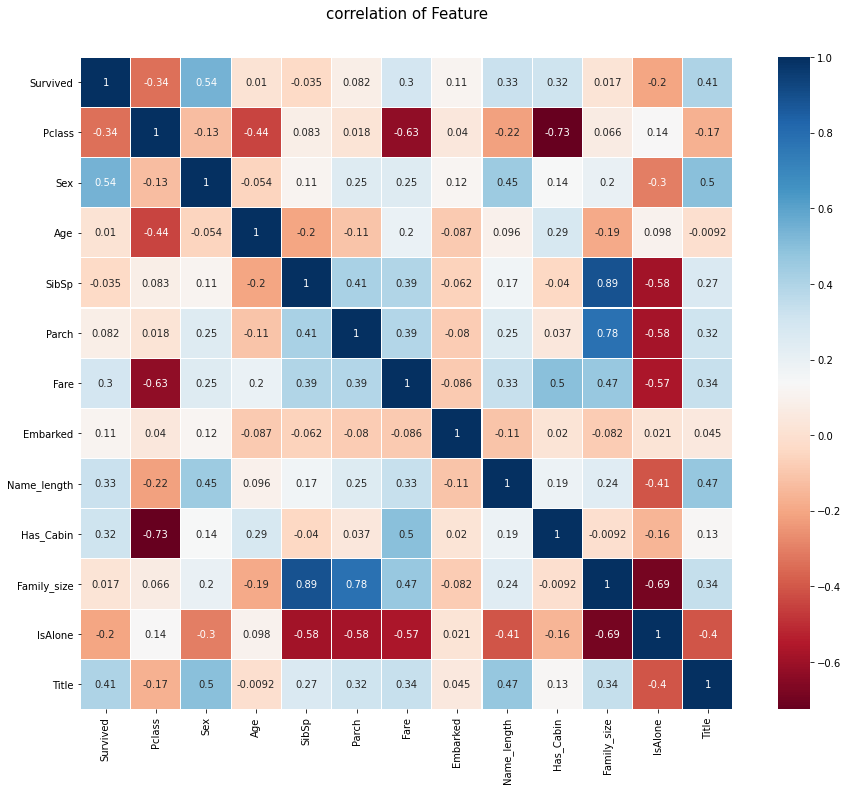

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,12))
plt.title('correlation of Feature', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
test.values

array([[3, 0, 3, ..., 1, 1, 0],
       [3, 1, 4, ..., 2, 0, 2],
       [2, 0, 4, ..., 1, 1, 0],
       ...,
       [3, 0, 4, ..., 1, 1, 0],
       [3, 0, 1, ..., 1, 1, 0],
       [3, 0, 1, ..., 3, 0, 3]])

In [ ]:
train[train.columns[1:]]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Has_Cabin,Family_size,IsAlone,Title
0,3,0,1,1,0,0,0,23,0,2,0,0
1,1,1,3,1,0,3,1,51,1,2,0,2
2,3,1,2,0,0,1,0,22,0,1,1,1
3,1,1,3,1,0,3,0,44,1,2,0,2
4,3,0,3,0,0,1,0,24,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,2,0,0,1,0,21,0,1,1,4
887,1,1,0,0,0,2,0,28,1,1,1,1
888,3,1,1,1,2,2,0,40,0,4,0,1
889,1,0,2,0,0,2,1,21,1,1,1,0


In [ ]:
train[train.columns[1:]].values

array([[3, 0, 1, ..., 2, 0, 0],
       [1, 1, 3, ..., 2, 0, 2],
       [3, 1, 2, ..., 1, 1, 1],
       ...,
       [3, 1, 1, ..., 4, 0, 1],
       [1, 0, 2, ..., 1, 1, 0],
       [3, 0, 3, ..., 1, 1, 0]])

In [ ]:
train_data = train[train.columns[1:]]
target = train[['Survived']]

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(train_data, target, test_size=0.3, random_state=2018)  ## test데이터도 전처리해서 같이 트레인셋, 타겟셋을 나눈다.

In [ ]:
train, test = train_test_split(train, test_size=0.3, random_state=0)
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

In [ ]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=0.5)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('SVC rbf의 정확도는', metrics.accuracy_score(prediction1, test_Y))
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('SVC rbf의 교차검증 점수는', result.mean())
print('SVC rbf의 f1 점수는', metrics.f1_score(prediction1, test_Y))

SVC rbf의 정확도는 0.8208955223880597
SVC rbf의 교차검증 점수는 0.7198005698005698
SVC rbf의 f1 점수는 0.7272727272727272


In [ ]:
model = svm.SVC(kernel='linear', C=1, gamma=0.5)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('SVC lin의 정확도는', metrics.accuracy_score(prediction2, test_Y))
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('SVC lin의 교차검증 값은', result.mean())
print('SVC lin의 f1 값은', metrics.f1_score(prediction2, test_Y))

SVC lin의 정확도는 0.8619402985074627
SVC lin의 교차검증 값은 0.8245014245014245
SVC lin의 f1 값은 0.8042328042328043


In [ ]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('랜덤포레스트의 정확도는', metrics.accuracy_score(prediction3, test_Y))
print('랜덤포레스트의 교차검증 점수는', result.mean())
print('랜덤포레스트의 f1값은', metrics.f1_score(prediction3, test_Y))

랜덤포레스트의 정확도는 0.8507462686567164
랜덤포레스트의 교차검증 점수는 0.8433048433048432
랜덤포레스트의 f1값은 0.7826086956521738


In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('KNN의 정확도는', metrics.accuracy_score(prediction4, test_Y))
print('KNN의 f1값은', metrics.f1_score(prediction4, test_Y))
print('KNN의 교차검증 점수는', result.mean())

KNN의 정확도는 0.7947761194029851
KNN의 f1값은 0.6927374301675977
KNN의 교차검증 점수는 0.7686609686609687


In [ ]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('가우시안의 정확도는', metrics.accuracy_score(prediction5, test_Y))
print('가우시안의 f1값은', metrics.f1_score(prediction5, test_Y))
print('가우시안의 교차검증 값은', result.mean())

가우시안의 정확도는 0.7798507462686567
가우시안의 f1값은 0.7121951219512195
가우시안의 교차검증 값은 0.8024216524216525


In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('의사결정트리의 정확도든', metrics.accuracy_score(prediction6, test_Y))
print('의사결정트리의 f1값은', metrics.f1_score(prediction6, test_Y))
print('의사결정트리의 교차검증 점수는', result.mean())

의사결정트리의 정확도든 0.7835820895522388
의사결정트리의 f1값은 0.6947368421052632
의사결정트리의 교차검증 점수는 0.798148148148148


In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
result = cross_val_score(model, test_X, test_Y, cv=10, scoring='accuracy')
print('로지스틱의 정확도든', metrics.accuracy_score(prediction7, test_Y))
print('로지스틱의 f1값은', metrics.f1_score(prediction7, test_Y))
print('로지스틱의 교차검증 점수는', result.mean())

로지스틱의 정확도든 0.8246268656716418
로지스틱의 f1값은 0.7486631016042781
로지스틱의 교차검증 점수는 0.8507122507122507


In [ ]:
for model in []

In [ ]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[:]]
X = train[train.columns[1:]]
Y = train['Survived']

In [ ]:
train, test = train_test_split(train, test_size=0.3, random_state=0, stratify=train['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

In [ ]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X,train_Y)
y_pred = model.fit(train_X, train_Y).predict(train_X)
print('SVC rbf의 정확도 점수는', metrics.accuracy_score(Y, y_pred))  ## y_pred ==> 예측한 값,    y_true ==> 실제 값
print('SVC rbf의 f1(성능값)은', metrics.f1_score(Y, y_pred))

ValueError: ignored

In [ ]:
model = svm.SVC(kernel='linear', C=1, gamma=.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('SVC lin의 정확도 점수는', metrics.accuracy_score(prediction2, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('SVC lin의 교차검증 점수는', result.mean())
print('SVC lin의 f1(성능값은)', metrics.f1_score(prediction2, test_Y))

SVC lin의 정확도 점수는 0.8235294117647058
SVC lin의 교차검증 점수는 0.763953488372093
SVC lin의 f1(성능값은) 0.7518796992481204


In [ ]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('랜덤포레스트의 정확도는', metrics.accuracy_score(prediction3, test_Y))
print('랜덤포레스트의 교차검증 점수는', result.mean())
print('랜덤포레스트의 f1값은', metrics.f1_score(prediction3, test_Y))

랜덤포레스트의 정확도는 0.8021390374331551
랜덤포레스트의 교차검증 점수는 0.7893234672304439
랜덤포레스트의 f1값은 0.7259259259259259


In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('KNN의 정확도는', metrics.accuracy_score(prediction4, test_Y))
print('KNN의 교차검증 점수는', result.mean())
print('KNN의 f1값은', metrics.f1_score(prediction4, test_Y))

KNN의 정확도는 0.8128342245989305
KNN의 교차검증 점수는 0.7361522198731502
KNN의 f1값은 0.7368421052631579


In [ ]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('가우시안의 정확도는', metrics.accuracy_score(prediction5, test_Y))
print('가우시안의 교차검증 점수는', result.mean())
print('가우시안의 f1값은', metrics.f1_score(prediction5, test_Y))

가우시안의 정확도는 0.8021390374331551
가우시안의 교차검증 점수는 0.7661205073995772
가우시안의 f1값은 0.7516778523489932


In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('로지스틱의 정확도는', metrics.accuracy_score(prediction6, test_Y))
print('로지스틱의 교차검증 점수는', result.mean())
print('로지스틱의 f1값은', metrics.f1_score(prediction6, test_Y))

로지스틱의 정확도는 0.7807486631016043
로지스틱의 교차검증 점수는 0.7845137420718815
로지스틱의 f1값은 0.6962962962962964


In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('결정트리의 정확도는', metrics.accuracy_score(prediction7, test_Y))
print('결정트리의 교차검증 점수는', result.mean())
print('결정트리의 f1값은', metrics.f1_score(prediction7, test_Y))

결정트리의 정확도는 0.7540106951871658
결정트리의 교차검증 점수는 0.7571881606765327
결정트리의 f1값은 0.676056338028169


In [ ]:
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
std=[]
accuracy=[]
classifiers = ['SVC lin',' SVC rbf', 'Logistic Regression', 'KNN', 'Decision Tree', 'Gausiian', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy') ## 교차검증 점수 보기위한 for문
  cv_result = cv_result
  xyz.append(cv_result.mean())  ## append = 리스트에 추가하기
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
SVC lin,0.761681,0.043572
SVC rbf,0.683192,0.036242
Logistic Regression,0.789218,0.037036
KNN,0.731660,0.044240
Decision Tree,0.745507,0.040842
Gausiian,0.766121,0.055529
Random Forest,0.791702,0.050057


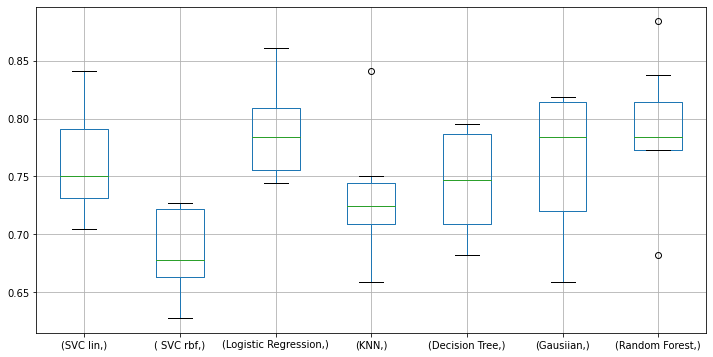

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

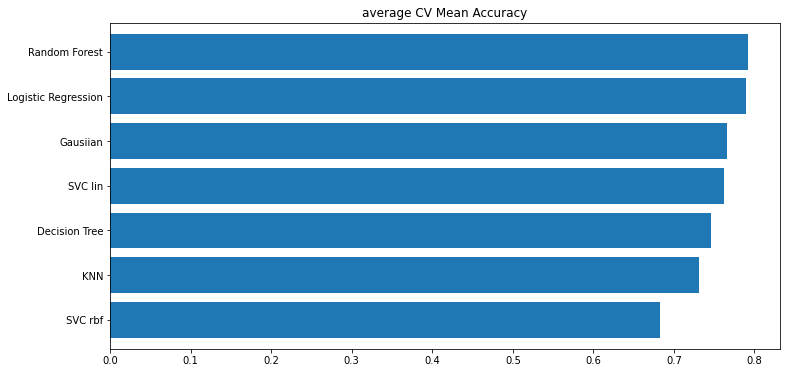

In [ ]:
new_models_dataframe2['CV Mean'].sort_values().plot.barh(width=0.8)
plt.title('average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(12,6)

Text(0.5, 1.0, 'GaussianNB')

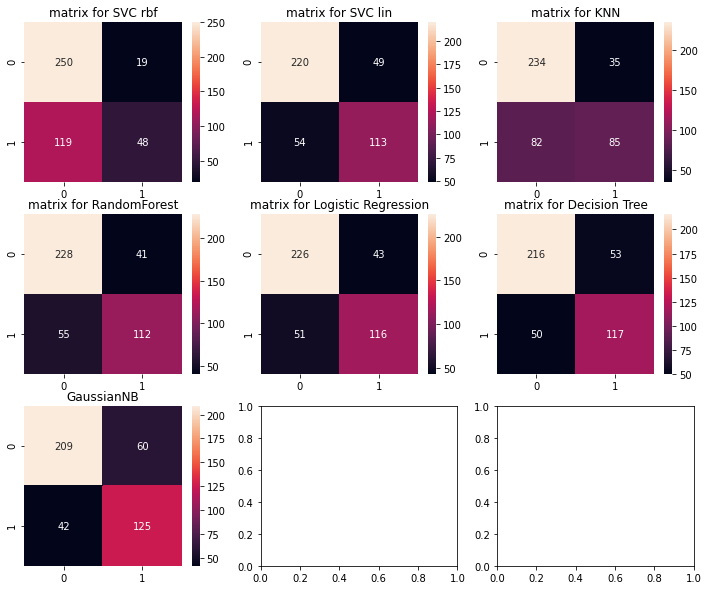

In [ ]:
f, ax =plt.subplots(3,3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('matrix for SVC rbf')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('matrix for SVC lin')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('matrix for RandomForest')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('GaussianNB')